In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\USER\\Desktop\\Data\\Flight.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df = df.iloc[:,1:]
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
df.drop('flight',axis=1, inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.nunique()

airline                 6
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [7]:
df.count()

airline             300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_5388\189664908.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


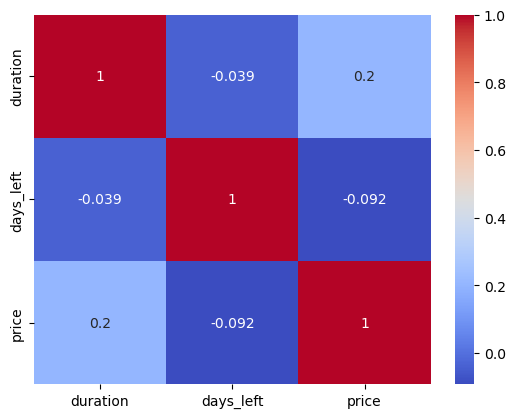

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [10]:
airline_price1 = pd.DataFrame(round(df[['airline', 'price']].groupby('airline').min(), 2).sort_values('price'))
airline_price2 = pd.DataFrame(round(df[['airline', 'price']].groupby('airline').median(), 2)).sort_values('price')
airline_price3 = pd.DataFrame(round(df[['airline', 'price']].groupby('airline').max(), 2)).sort_values('price')
airline_price = pd.concat([airline_price1, airline_price2, airline_price3], axis=1)
airline_price.columns = ['min_price', 'avg_price', 'max_price']

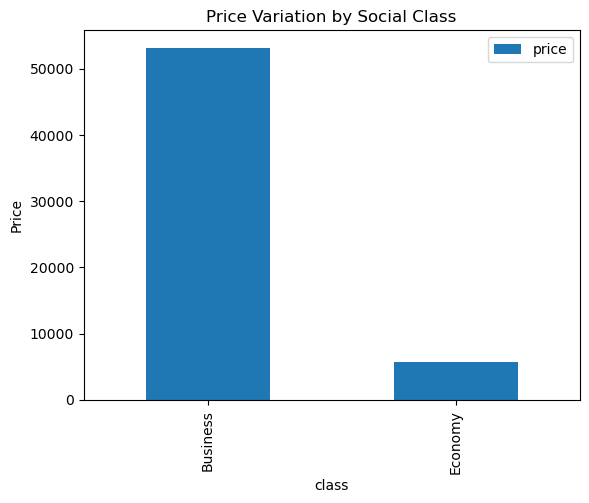

The Average Price is higher for Business class than the Economy Class


In [11]:
#Price Variation by Social Class
df[['class', 'price']].groupby('class').median().plot(kind='bar')
plt.title("Price Variation by Social Class")
plt.ylabel("Price")
plt.show()
print("The Average Price is higher for Business class than the Economy Class")

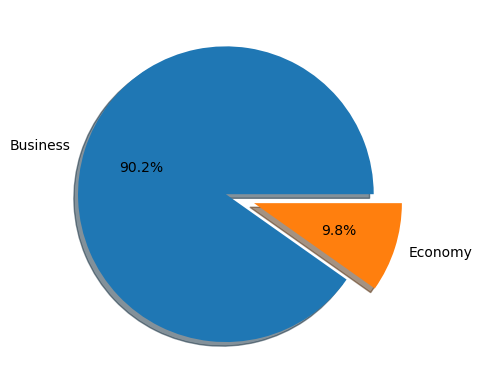

In [29]:
plt.pie(df[['class', 'price']].groupby('class').median()['price'], labels=['Business', 'Economy'], autopct='%1.01f%%',
       explode=(0.0,.2), shadow=True)
plt.show()

In [126]:
#Price Variation by Airline and Social Class
airline_price = df[['airline', 'class', 'price']].groupby(['airline', 'class']).median().sort_values('price', ascending=True)
airline_price

,,price
airline,class,
AirAsia,Economy,3276.0
Indigo,Economy,4453.0
GO_FIRST,Economy,5336.0
SpiceJet,Economy,5654.0
Air_India,Economy,6082.0
Vistara,Economy,6461.0
Air_India,Business,49613.0
Vistara,Business,56588.0


In [127]:
#Price Variation by Airline and Social Class
airline_price = df[['airline', 'class', 'price']].groupby(['airline', 'class']).median().sort_values('price', ascending=True)
airline_price

,,price
airline,class,
AirAsia,Economy,3276.0
Indigo,Economy,4453.0
GO_FIRST,Economy,5336.0
SpiceJet,Economy,5654.0
Air_India,Economy,6082.0
Vistara,Economy,6461.0
Air_India,Business,49613.0
Vistara,Business,56588.0


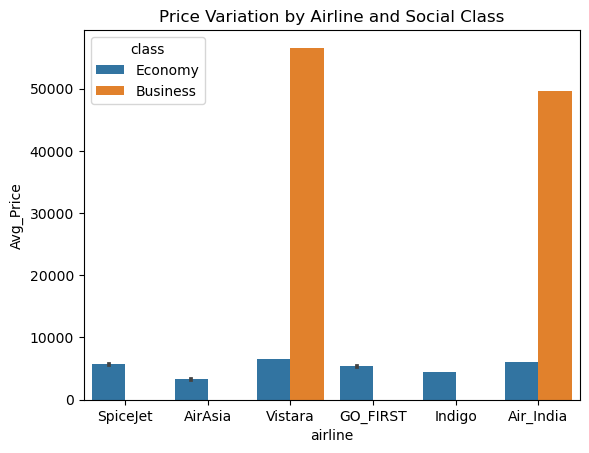

Only Vistra and Air_India airlines have passengers in Business Class


In [128]:
#Visual of Price Variation by Airline and Social Class
sns.barplot(data=df, x='airline', y='price', estimator='median', hue='class')
plt.title("Price Variation by Airline and Social Class")
plt.ylabel("Avg_Price")
plt.show()
print("Only Vistra and Air_India airlines have passengers in Business Class")

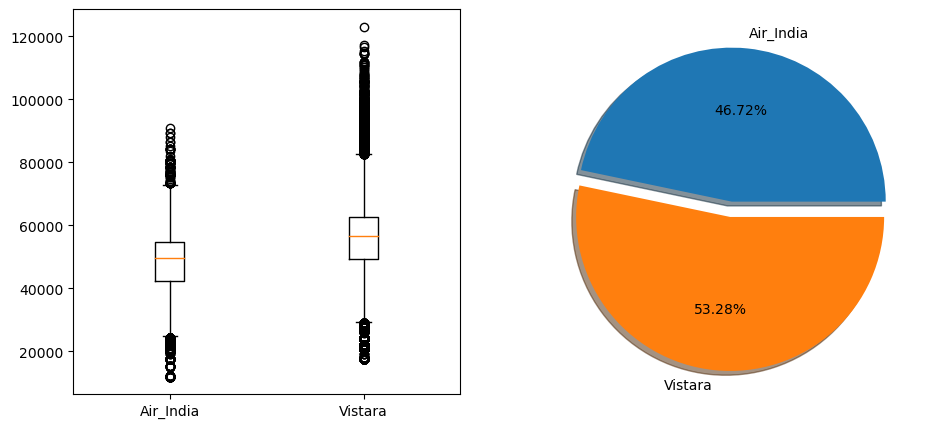

In [59]:
import warnings
warnings.filterwarnings('ignore')

#Price by airline in Business Class
bus_airline_price_list = []
business = df[df['class'] == 'Business']
for airline in business['airline'].unique():
    price = business[business['airline'] == airline]['price']
    bus_airline_price_list.append(price)
plt.figure(figsize=(11,5))
plt.subplot(121)
plt.boxplot(bus_airline_price_list, labels=business['airline'].unique())
plt.subplot(122)
plt.pie(df[df['class'] == 'Business'].groupby('airline').median()['price'], labels=business['airline'].unique(), 
        autopct='%1.2f%%', explode=(0.0,0.1), shadow=True)
plt.show()

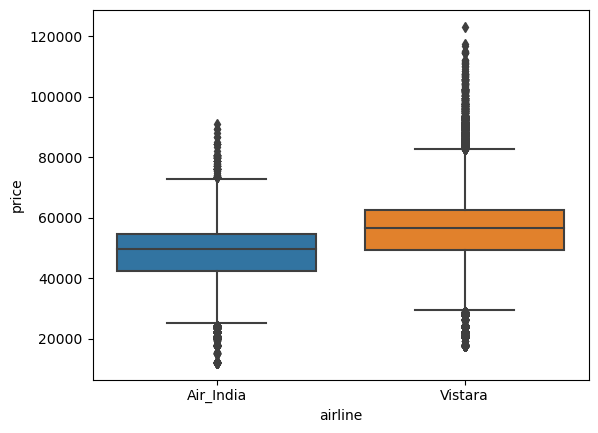

In [134]:
#Using Seaborn
sns.boxplot(business, x='airline', y='price')
plt.show()

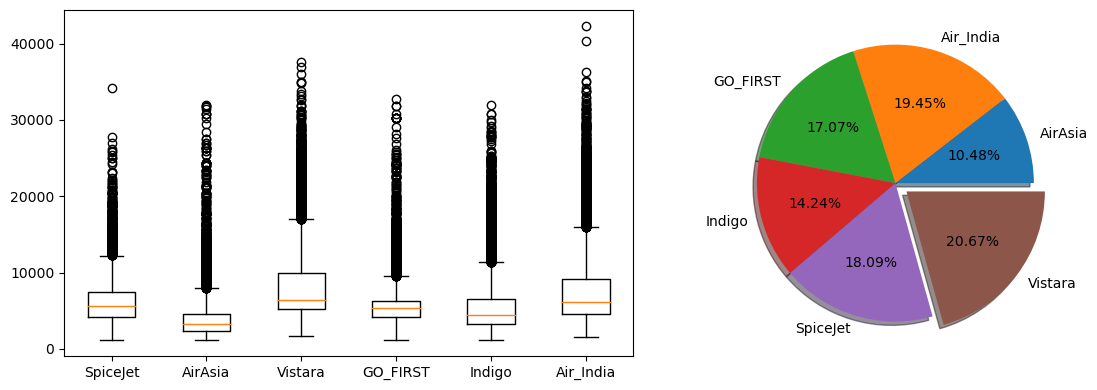

In [78]:
#Price by airline in Economy Class
ec_airline_price_list = []
economy = df[df['class'] == 'Economy']
for airline in economy['airline'].unique():
    price = economy[economy['airline'] == airline]['price']
    ec_airline_price_list.append(price)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.boxplot(ec_airline_price_list, labels=economy['airline'].unique())

plt.subplot(122)
plt.pie(df[df['class'] == 'Economy'].groupby('airline').median()['price'], 
        labels=df[df['class'] == 'Economy'].groupby('airline').median().index, 
        autopct='%1.2f%%', explode=(0.0,0.0,0.0,0.0,0.0,0.1), shadow=True)
plt.tight_layout()
plt.show()

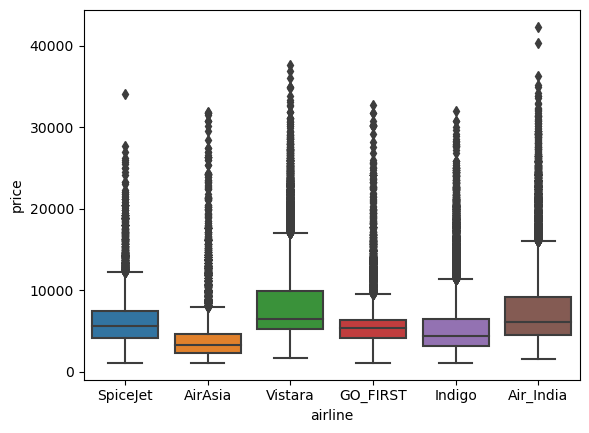

In [135]:
#Using Seaborn
sns.boxplot(economy, x='airline', y='price')
plt.show()

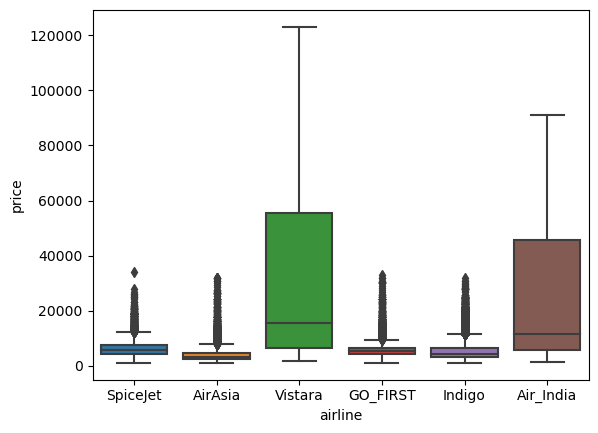

In [131]:
#Overall Price range by airline
sns.boxplot(df, x='airline', y='price')
plt.show()

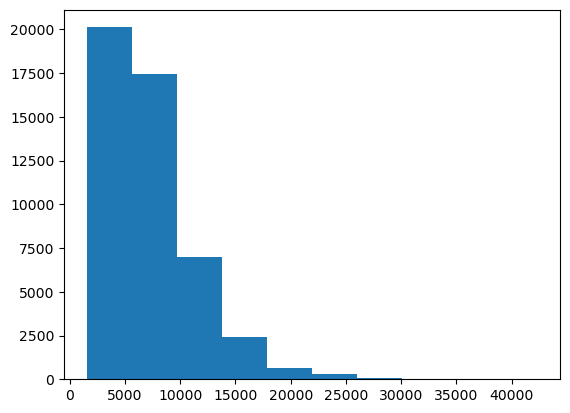

In [136]:
plt.hist(ec_airline_price_list[5])
plt.show()

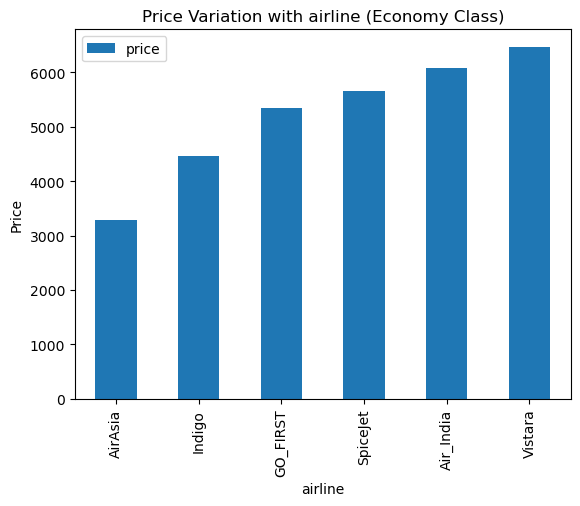

On an average, Vistara followed by Air_India are the most expensive airlines while AirAsia followed by Indigo are       the cheapest for Economy Class


In [64]:
#Price Variation by Airline within Economy Class
Economy = df[df['class'] == 'Economy'][['airline', 'price']].groupby('airline').median().sort_values('price', ascending=True)
Economy.plot(kind='bar')
plt.title('Price Variation with airline (Economy Class)')
plt.ylabel("Price")
plt.show()
print("On an average, Vistara followed by Air_India are the most expensive airlines while AirAsia followed by Indigo are\
       the cheapest for Economy Class")

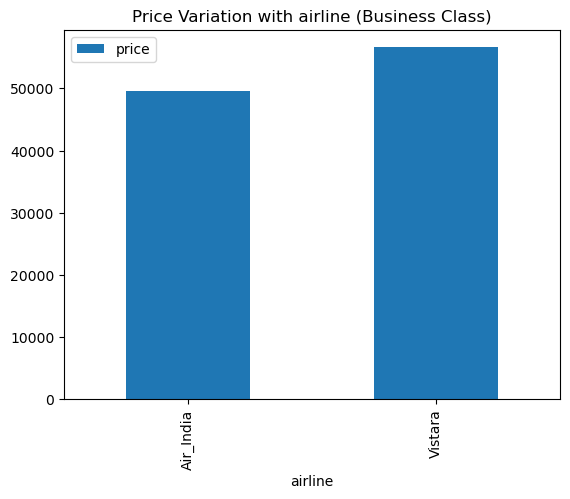

Haven already establishe as only two with Business class passengers, Vistara is averagely more     expensive than Air_India


In [140]:
#Price Variation by Airline within Business Class
Business = df[df['class'] == 'Business'][['airline', 'price']].groupby('airline')\
    .median().sort_values('price', ascending=True)
Business.plot(kind='bar')
plt.title('Price Variation with airline (Business Class)')
plt.show()
print("Haven already establishe as only two with Business class passengers, Vistara is averagely more \
    expensive than Air_India")

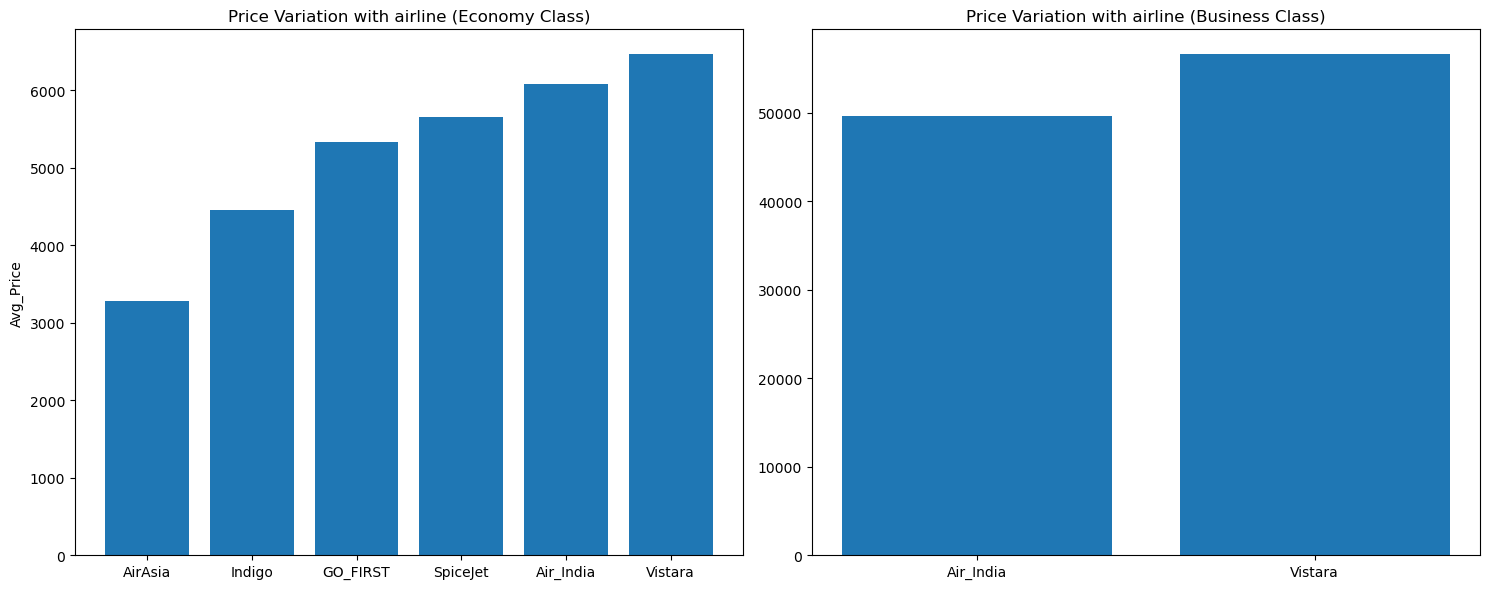

Overall, Vistara and Air_India are the most expensive airlines


In [141]:
#Price Variation by Airline within Economy Class
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar(Economy.index, Economy['price'])
plt.title('Price Variation with airline (Economy Class)')
plt.ylabel("Avg_Price")
           
#Price Variation by Airline within Business Class
plt.subplot(122)
plt.bar(Business.index, Business['price'])
plt.title('Price Variation with airline (Business Class)')
plt.tight_layout()
plt.show()
print("Overall, Vistara and Air_India are the most expensive airlines")

In [142]:
#Further proof of the overall price variation
airline_price1 = pd.DataFrame(round(df[['airline', 'price']].groupby('airline').min(), 2).sort_values('price'))
airline_price2 = pd.DataFrame(round(df[['airline', 'price']].groupby('airline').median(), 2)).sort_values('price')
airline_price3 = pd.DataFrame(round(df[['airline', 'price']].groupby('airline').max(), 2)).sort_values('price')
airline_price4 = pd.concat([airline_price1, airline_price2, airline_price3], axis=1)
airline_price4.columns = ['min_price', 'median_price', 'max_price']
airline_price4

,min_price,median_price,max_price
airline,,,
AirAsia,1105,3276.0,31917
GO_FIRST,1105,5336.0,32803
Indigo,1105,4453.0,31952
SpiceJet,1106,5654.0,34158
Air_India,1526,11520.0,90970
Vistara,1714,15543.0,123071


In [143]:
by_airline = pd.DataFrame({'airline': list(airline_price4.index),
                            'min_price': list(airline_price1.values.flatten()),
                           'median_price': list(airline_price2.values.flatten()),
                           'max_price': list(airline_price3.values.flatten())})
by_airline

,airline,min_price,median_price,max_price
0,AirAsia,1105,3276.0,31917
1,GO_FIRST,1105,4453.0,31952
2,Indigo,1105,5336.0,32803
3,SpiceJet,1106,5654.0,34158
4,Air_India,1526,11520.0,90970
5,Vistara,1714,15543.0,123071


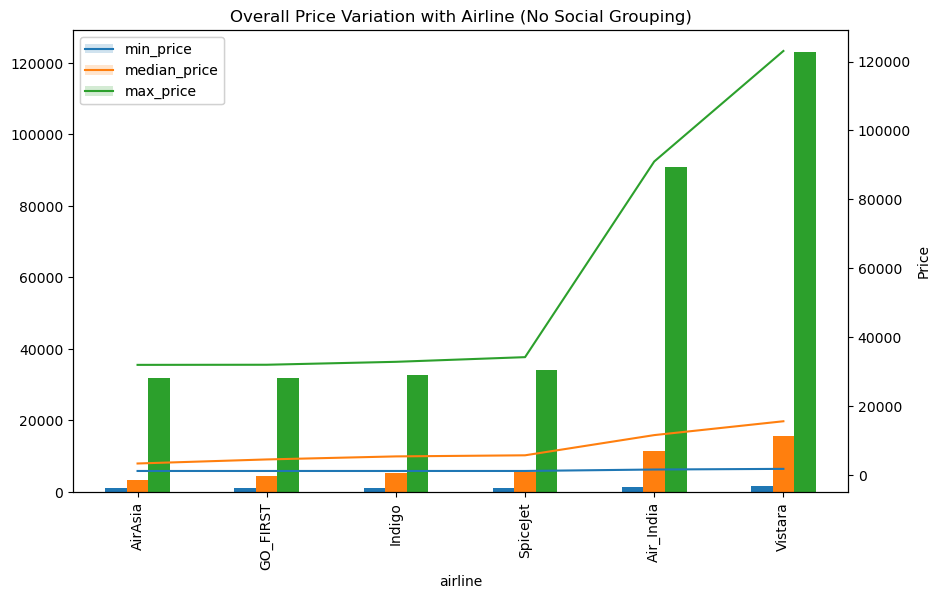

In [144]:
#Visualization1
ax2 = by_airline.plot('airline', ['min_price', 'median_price', 'max_price'], kind='bar', figsize=(10,6))
ax3 = ax2.twinx()
by_airline.plot('airline', ['min_price', 'median_price', 'max_price'], ax=ax3)
plt.ylabel("Price")
plt.title("Overall Price Variation with Airline (No Social Grouping)")
plt.show()

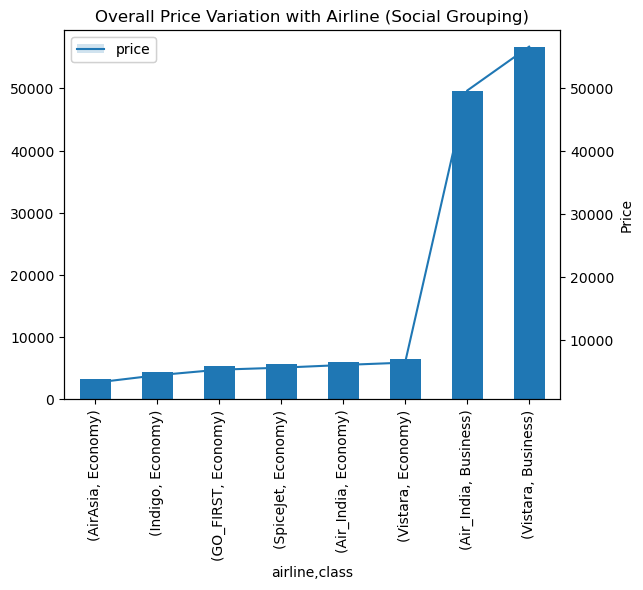

In [145]:
#Visualisation2
ax = airline_price.plot(kind="bar")
ax1 = ax.twinx()
airline_price.plot(kind="line", ax=ax1)
ax.legend()
ax1.legend()
plt.ylabel("Price")
plt.title("Overall Price Variation with Airline (Social Grouping)")
plt.show()

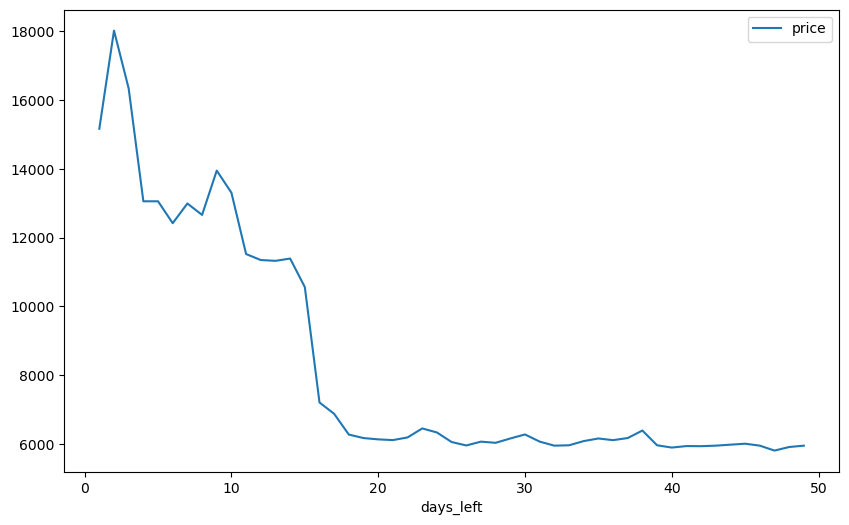

In [146]:
#Overall price variation by days left before departure
df[['days_left', 'price']].groupby('days_left').median().sort_values('days_left', ascending=True).plot(kind='line', figsize=(10,6))
plt.show()

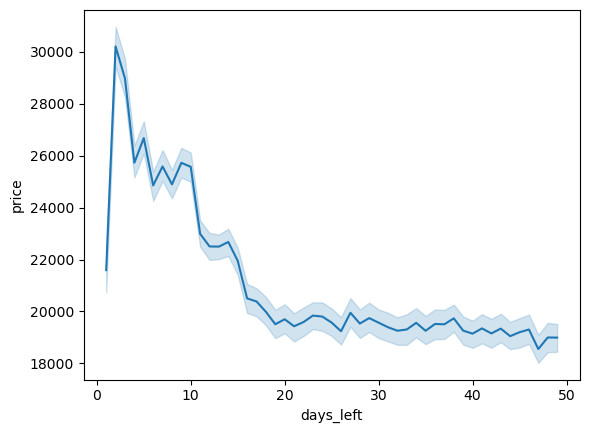

There seems to be an unnatural price behaviour between 1 day left and 2 days left


In [147]:
#Using Seaborn
sns.lineplot(df, x='days_left', y='price')
plt.show()
print("There seems to be an unnatural price behaviour between 1 day left and 2 days left")

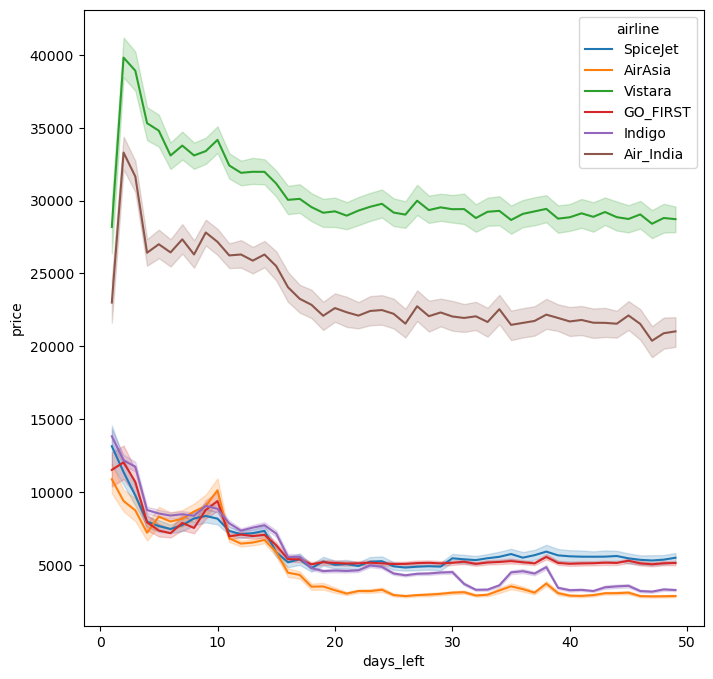

In [148]:
#Price varialtion by days left before departure and airline
plt.figure(figsize=(8,8))
sns.lineplot(df, x='days_left', y='price', hue='airline')
plt.show()

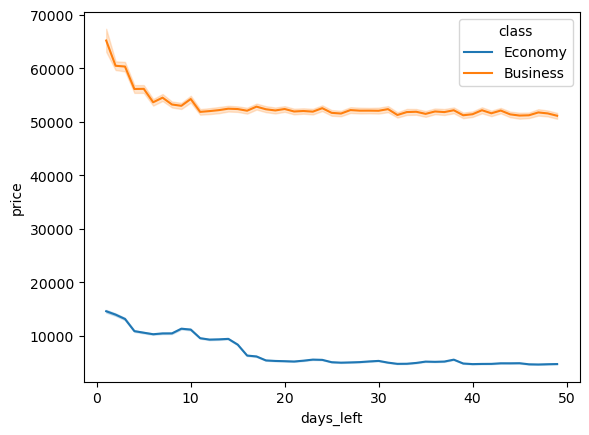

In [149]:
#Price variation by days left before departure and social class
sns.lineplot(df, x='days_left', y='price', hue='class')
plt.show()

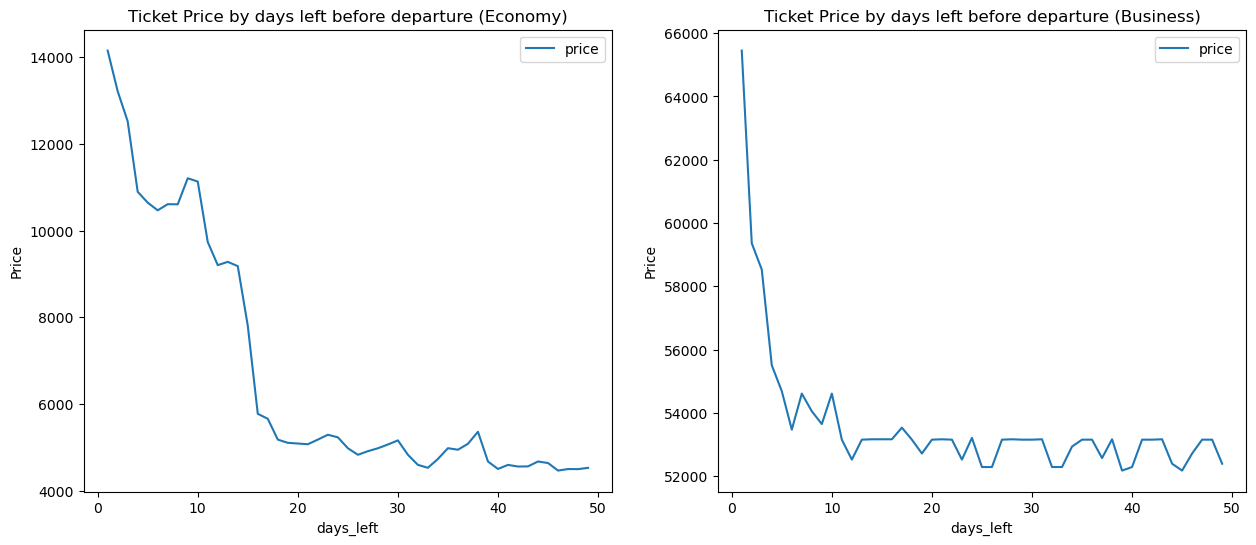

Apparently, Ticket prices are most expensive with 1 or 2 days left before departure in both Economy and Business Class


In [150]:
#Price by Days left in Economy
pbdl_ec = df[df['class']=='Economy'][['days_left', 'price']].groupby('days_left').median()
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(pbdl_ec)
plt.title("Ticket Price by days left before departure (Economy)")
plt.ylabel("Price")


#Price by Days left in Business
pbdl_bus = df[df['class']=='Business'][['days_left', 'price']].groupby('days_left').median()
plt.subplot(122)
sns.lineplot(pbdl_bus)
plt.title("Ticket Price by days left before departure (Business)")
plt.ylabel("Price")
plt.show()
print("Apparently, Ticket prices are most expensive with 1 or 2 days left before departure in both Economy and Business Class")

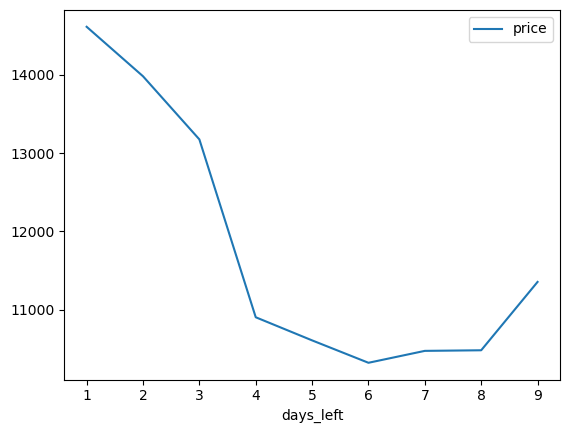

In [152]:
#day 1 or 2 left before departure
pbdl_ec = df[df['class']=='Economy']
pltdl_ec = pbdl_ec[pbdl_ec['days_left'] < 10][['days_left', 'price']].groupby('days_left').mean()
sns.lineplot(pltdl_ec)
plt.show()

In [178]:
#Overall ticket price by time
time_price = df[['departure_time', 'arrival_time', 'price']].groupby(['departure_time', 'arrival_time']).median()\
    .sort_values('price', ascending=False)
time_price

,,price
departure_time,arrival_time,
Late_Night,Night,44432.0
Night,Evening,20643.0
Early_Morning,Late_Night,14376.0
Night,Afternoon,12847.0
Evening,Morning,11488.0
Afternoon,Morning,11348.5
Evening,Afternoon,11205.0
Morning,Night,10902.0
Evening,Evening,10680.0


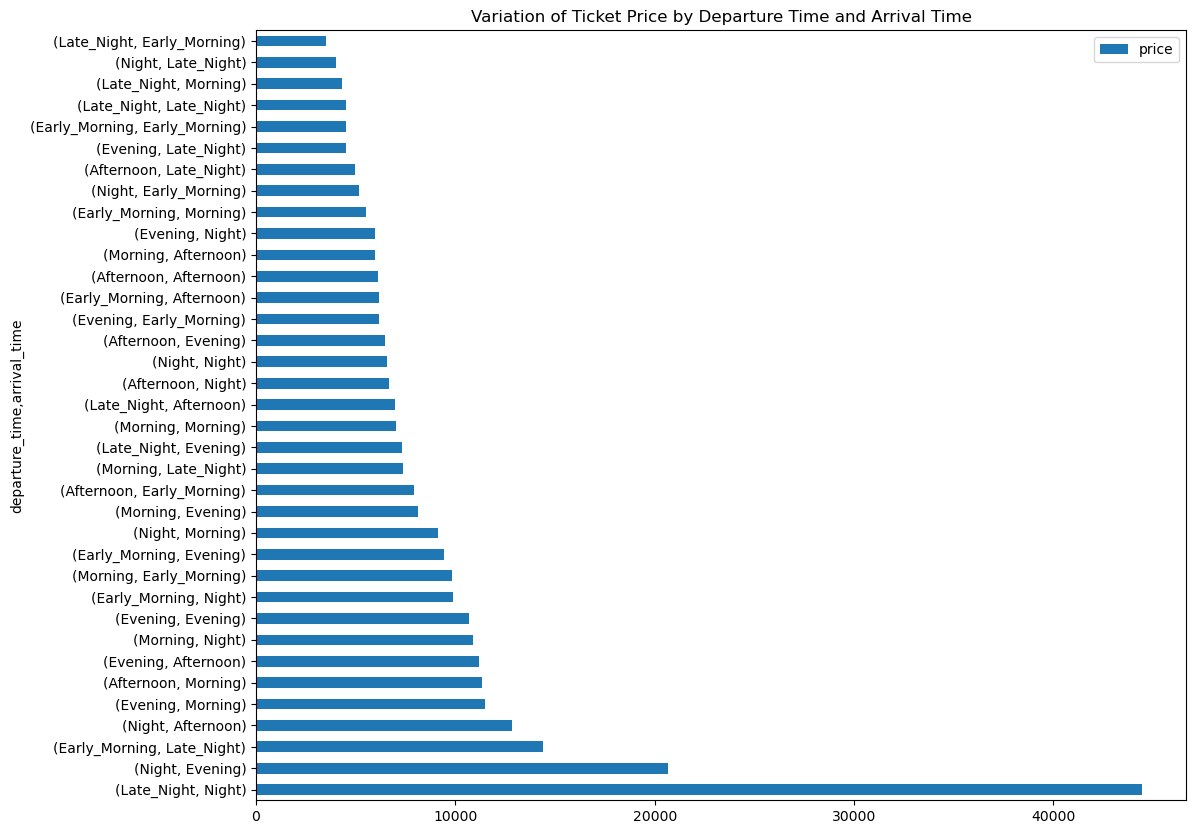

In [154]:
#Visualization
time_price.plot(kind='barh', figsize=(12,10))
plt.title('Variation of Ticket Price by Departure Time and Arrival Time')
plt.show()

### It could be observed that indeed Ticket price is significantly influenced by departure time and arrival time.
    
### With the Late_Night,Late_Night being the cheapest and Night,Evening being the most expensive.

In [177]:
#Price by time in Economy Class
ec_time_price = df[df['class']=='Economy'][['departure_time', 'arrival_time', 'price']].groupby(['departure_time', 'arrival_time']).median()\
    .sort_values('price', ascending=False)
ec_time_price

,,price
departure_time,arrival_time,
Early_Morning,Late_Night,6672.0
Late_Night,Night,6653.0
Night,Evening,6500.5
Late_Night,Afternoon,6489.0
Morning,Night,6450.0
Late_Night,Evening,6395.0
Early_Morning,Evening,6390.0
Morning,Evening,6331.0
Early_Morning,Night,6226.0


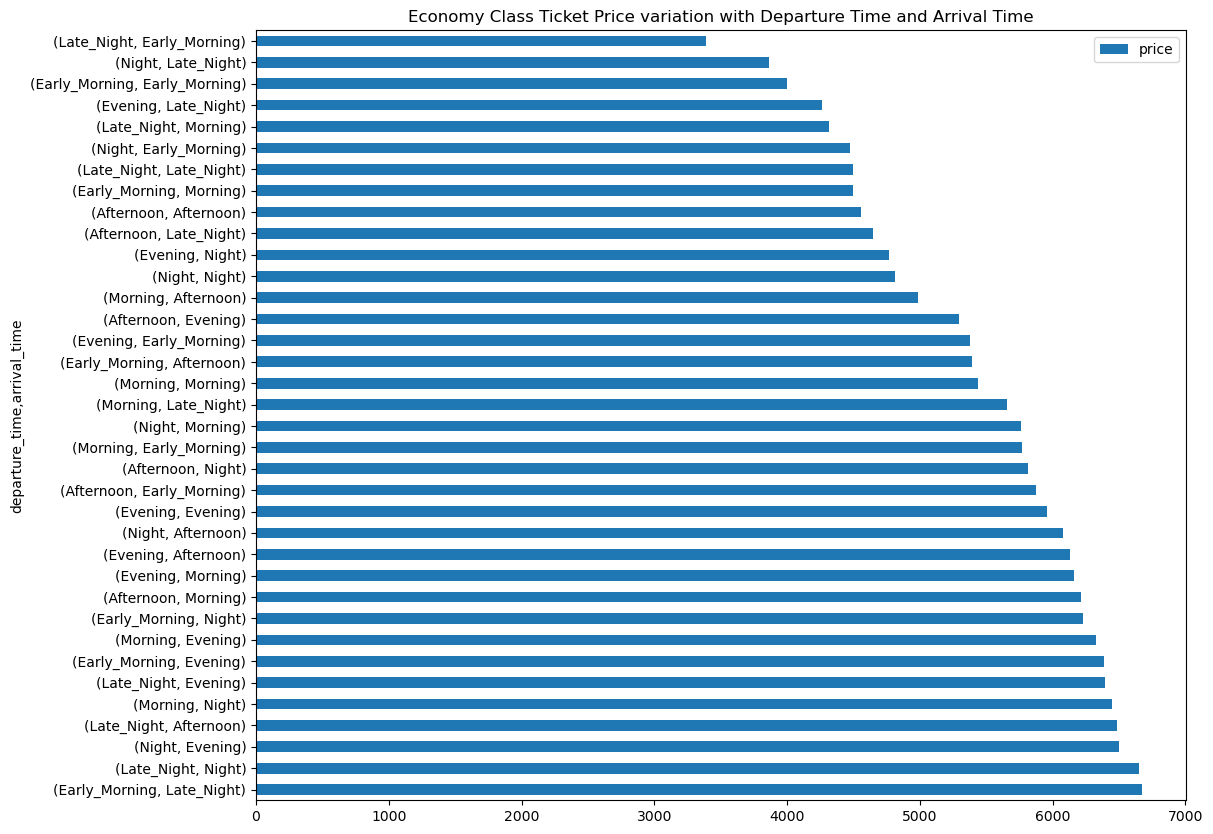

In [156]:
#Visualization
ec_time_price.plot(kind='barh', figsize=(12,10))
plt.title('Economy Class Ticket Price variation with Departure Time and Arrival Time')
plt.show()

### Also, When strictly considering the Economy class alone, Ticket price is still influenced by departure time and arrival time.
    
### However, Late_Night - Early_Morning is the cheapest here while  Early_Morning - Late_Night is the most expensive.

In [176]:
#Price variation by time in Business class
bu_time_price = df[df['class']=='Business'][['departure_time', 'arrival_time', 'price']].groupby(['departure_time', 'arrival_time']).median()\
    .sort_values('price', ascending=False)
bu_time_price

price
departure_time arrival_time          
Morning        Night          56702.0
Evening        Morning        56590.0
Morning        Evening        55983.0
Early_Morning  Late_Night     55982.0
               Night          55377.0
               Evening        55377.0
Night          Evening        54896.0
               Afternoon      54841.0
Evening        Late_Night     54841.0
Night          Morning        54777.0
Afternoon      Night          54684.0
Evening        Evening        54608.0
Afternoon      Late_Night     54608.0
Morning        Late_Night     54608.0
Early_Morning  Afternoon      53152.0
Late_Night     Afternoon      52586.0
               Evening        52586.0
               Morning        52586.0
               Night          52586.0
Evening        Early_Morning  52287.0
               Afternoon      52175.0
Afternoon      Morning        52063.0
Night          Early_Morning  49207.0
Evening        Night          47576.0
Afternoon      Evening        45672.0
Morning        Early_Morning  45257.0
Afternoon      Early_Morning  44405.0
Morning        Morning        44328.0
Night          Night          41974.0
Morning        Afternoon      39555.0
Early_Morning  Early_Morning  37985.0
Afternoon      Afternoon      37417.0
Night          Late_Night     34460.0
Early_Morning  Morning        32923.0
Late_Night     Early_Morning  25000.0

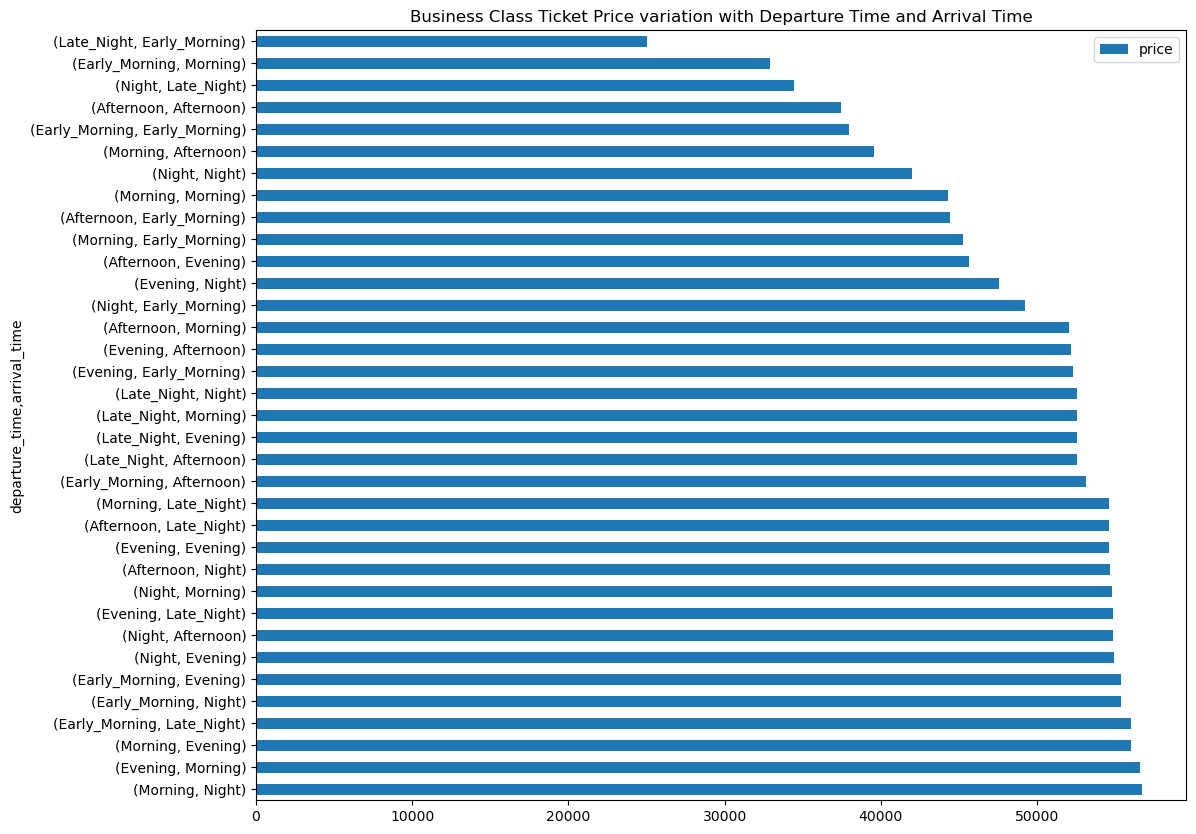

In [158]:
#Visualization
bu_time_price.plot(kind='barh', figsize=(12,10))
plt.title('Business Class Ticket Price variation with Departure Time and Arrival Time')
plt.show()

### With Business class ticket price alos influenced by departure time and arrival time, Late_Night - Early_Morning is the cheapest here while  Morning - Night is the most expensive.

In [175]:
#Overall Price variation by locations
location_price = df[['source_city', 'destination_city', 'price']].groupby(['source_city', 'destination_city']).median()\
    .sort_values('price', ascending=False)
location_price

price
source_city destination_city         
Chennai     Bangalore         10469.0
Bangalore   Chennai            9241.0
Kolkata     Chennai            8589.0
            Hyderabad          8467.0
Chennai     Kolkata            8394.0
            Mumbai             8233.0
Mumbai      Chennai            8148.0
Bangalore   Kolkata            8112.0
Kolkata     Bangalore          8111.0
            Mumbai             7958.0
Bangalore   Hyderabad          7813.0
Hyderabad   Kolkata            7767.0
            Chennai            7702.0
Mumbai      Hyderabad          7584.0
            Kolkata            7518.0
Delhi       Chennai            7425.0
Chennai     Hyderabad          7373.0
            Delhi              7352.0
Delhi       Mumbai             7262.0
Mumbai      Bangalore          7192.0
Bangalore   Delhi              7164.0
            Mumbai             7113.0
Hyderabad   Bangalore          7091.0
Delhi       Kolkata            7084.0
Kolkata     Delhi              6723.0
Delhi       Bangalore          6642.0
Hyderabad   Mumbai             6633.0
Mumbai      Delhi              6300.0
Hyderabad   Delhi              6138.0
Delhi       Hyderabad          6109.0

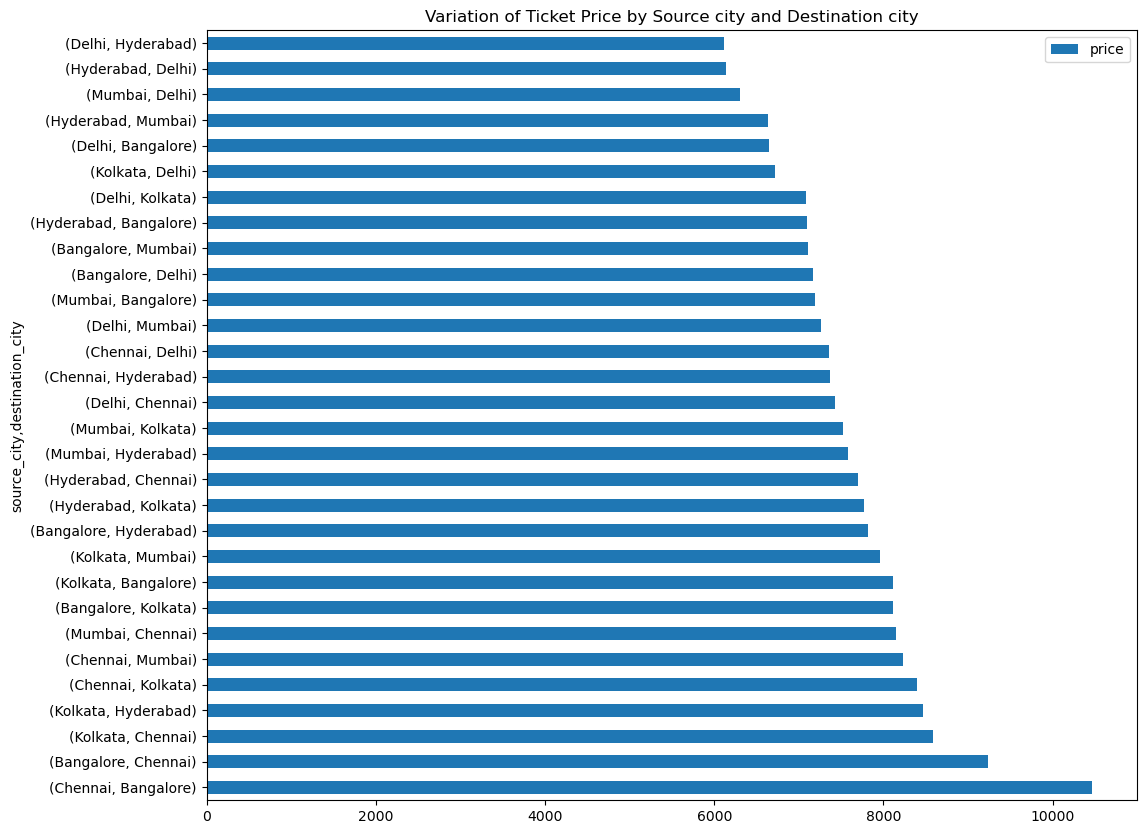

In [160]:
#Visualization
location_price.plot(kind='barh', figsize=(12,10))
plt.title('Variation of Ticket Price by Source city and Destination city')
plt.show()

### It is found that Ticket price is significantly influenced by source city and destination city.
    
### With the Hyderabad to Delhi being the cheapest and Chennai to Bangalor being the most expensive.

In [174]:
#Price variation by locations in Economy class
ec_location_price = df[df['class']=='Economy'][['source_city', 'destination_city', 'price']].groupby(['source_city', 'destination_city']).median()\
    .sort_values('price', ascending=False)
ec_location_price

price
source_city destination_city        
Kolkata     Chennai           6489.0
            Bangalore         6489.0
            Hyderabad         6488.0
            Delhi             6461.0
Mumbai      Bangalore         6319.0
Bangalore   Kolkata           6271.0
            Mumbai            6191.0
            Chennai           6161.0
Chennai     Bangalore         6161.0
Kolkata     Mumbai            6067.0
Hyderabad   Kolkata           5960.0
Delhi       Kolkata           5955.0
Mumbai      Kolkata           5949.0
Chennai     Kolkata           5937.0
Hyderabad   Delhi             5823.0
Bangalore   Hyderabad         5808.0
Delhi       Hyderabad         5761.0
Mumbai      Delhi             5445.0
Hyderabad   Bangalore         5441.0
Delhi       Mumbai            5284.0
Chennai     Delhi             5100.0
            Mumbai            5037.0
Delhi       Chennai           4979.0
Mumbai      Chennai           4732.0
Chennai     Hyderabad         4714.0
Hyderabad   Chennai           4674.0
            Mumbai            4660.0
Delhi       Bangalore         4500.0
Bangalore   Delhi             4500.0
Mumbai      Hyderabad         4263.0

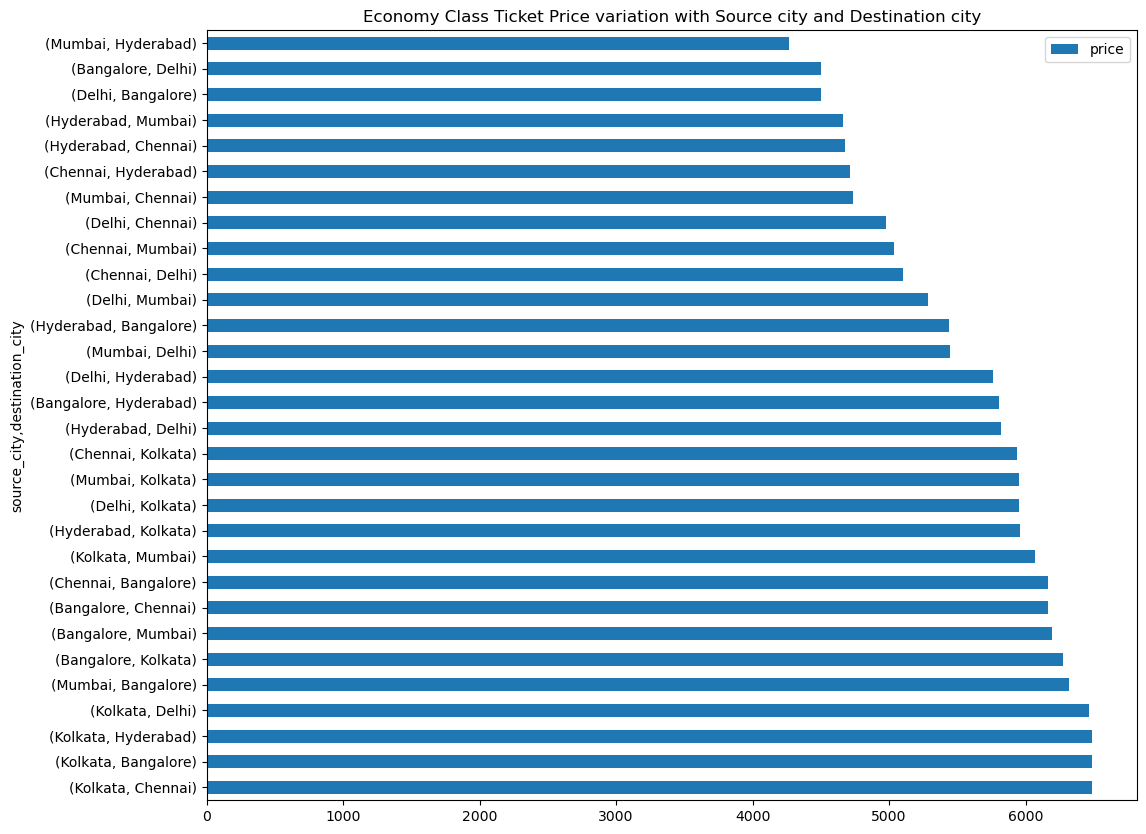

In [162]:
#Visualization
ec_location_price.plot(kind='barh', figsize=(12,10))
plt.title('Economy Class Ticket Price variation with Source city and Destination city')
plt.show()

### The Economy class Ticket price is influenced by source city and destination city with Mumbai to Hyderabad being the cheapest and Kolkata to Chennai being the most expensive.

In [163]:
#Price variation by source and destination city in Business class
bu_location_price = df[df['class']=='Business'][['source_city', 'destination_city', 'price']].groupby(['source_city', 'destination_city']).median()\
    .sort_values('price', ascending=False)
bu_location_price

price
source_city destination_city         
Kolkata     Bangalore         60978.0
Bangalore   Kolkata           60508.0
Chennai     Bangalore         58970.0
Kolkata     Mumbai            58111.0
Chennai     Delhi             57920.0
Mumbai      Kolkata           57565.0
            Chennai           57453.0
Delhi       Kolkata           57405.0
Hyderabad   Bangalore         56590.0
Bangalore   Hyderabad         56476.0
Chennai     Mumbai            56273.0
Bangalore   Mumbai            56058.0
Kolkata     Chennai           55983.0
Chennai     Kolkata           55377.0
Mumbai      Bangalore         54608.0
Kolkata     Delhi             53743.0
Mumbai      Hyderabad         53645.0
Hyderabad   Mumbai            52715.0
Delhi       Chennai           52392.0
Kolkata     Hyderabad         52175.0
Hyderabad   Kolkata           51819.0
            Chennai           51595.0
Chennai     Hyderabad         51345.0
Bangalore   Delhi             50361.0
            Chennai           49992.0
Delhi       Bangalore         49177.0
Hyderabad   Delhi             47395.0
Delhi       Hyderabad         46097.0
            Mumbai            42312.0
Mumbai      Delhi             41269.0

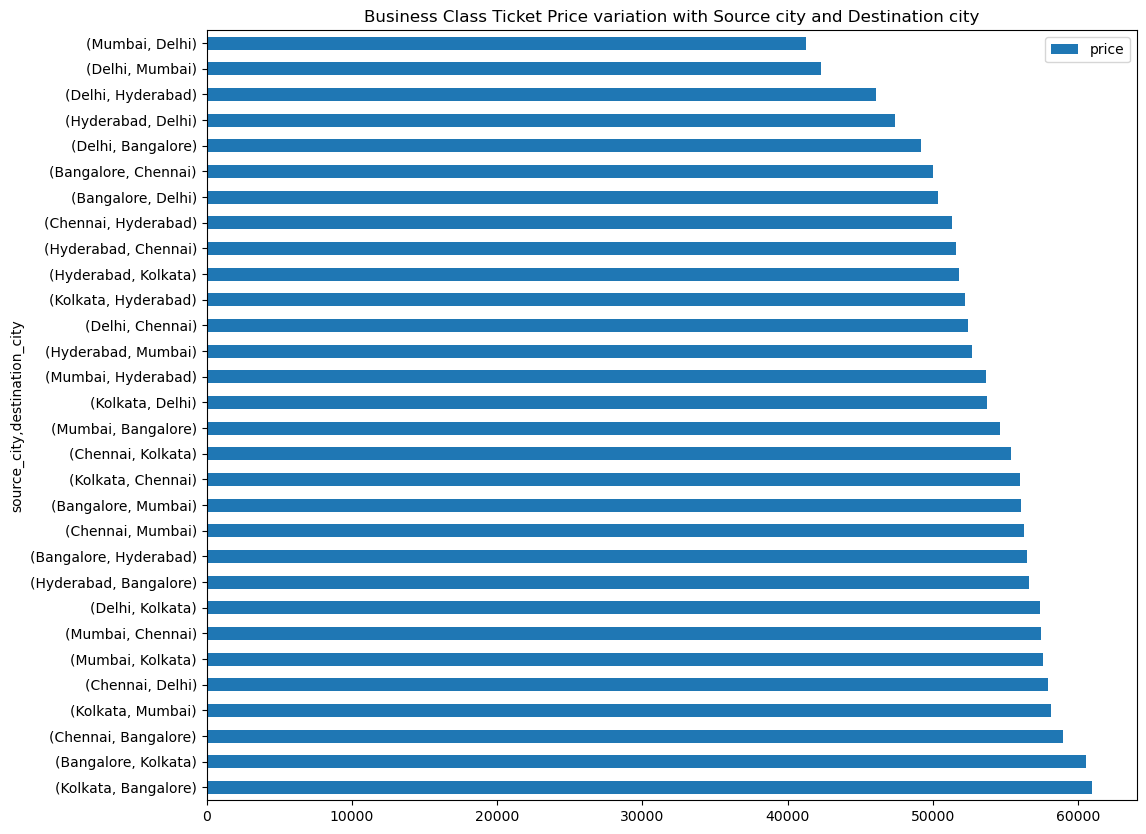

In [164]:
#Visualization
bu_location_price.plot(kind='barh', figsize=(12,10))
plt.title('Business Class Ticket Price variation with Source city and Destination city')
plt.show()

### The Economy class Ticket price is also influenced by source city and destination city with Mumbai-Delhi/Mumbai-Delhi being the cheapest and Kolkata-Bangalore/Bangalore-Kolkata being the most expensive.

In [168]:
df.value_counts('stops')

stops
one            250863
zero            36004
two_or_more     13286
dtype: int64

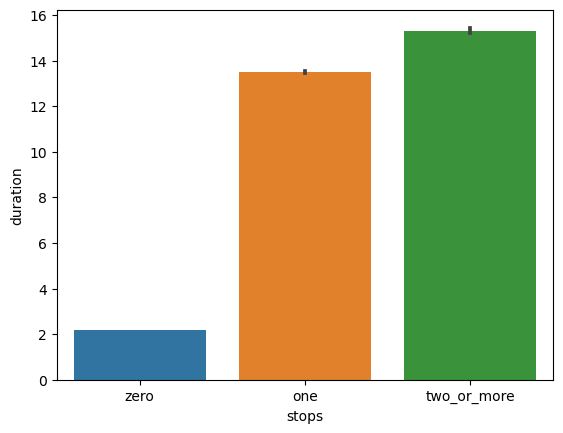

In [169]:
#duration by number of stops
sns.barplot(df, x='stops', y = 'duration')
plt.show()

In [179]:
#Duration by locations and number of stops
nonstop_loc_dur = df[df['stops'] == 'zero'][['source_city', 'destination_city', 'duration']].groupby(['source_city', 'destination_city']).median()\
    .sort_values('duration', ascending=True)
nonstop_loc_dur

duration
source_city destination_city          
Bangalore   Chennai               1.08
Chennai     Bangalore             1.08
Bangalore   Hyderabad             1.17
Chennai     Hyderabad             1.25
Hyderabad   Chennai               1.25
            Bangalore             1.25
            Mumbai                1.50
Mumbai      Hyderabad             1.50
            Bangalore             1.75
Bangalore   Mumbai                1.83
Mumbai      Chennai               2.00
Chennai     Mumbai                2.00
Hyderabad   Kolkata               2.08
Mumbai      Delhi                 2.17
Delhi       Mumbai                2.17
            Kolkata               2.17
            Hyderabad             2.25
Hyderabad   Delhi                 2.25
Kolkata     Hyderabad             2.25
            Chennai               2.33
Chennai     Kolkata               2.42
Kolkata     Delhi                 2.50
Bangalore   Kolkata               2.50
Kolkata     Bangalore             2.67
Mumbai      Kolkata               2.67
Delhi       Bangalore             2.75
Bangalore   Delhi                 2.75
Delhi       Chennai               2.83
Kolkata     Mumbai                2.83
Chennai     Delhi                 2.83

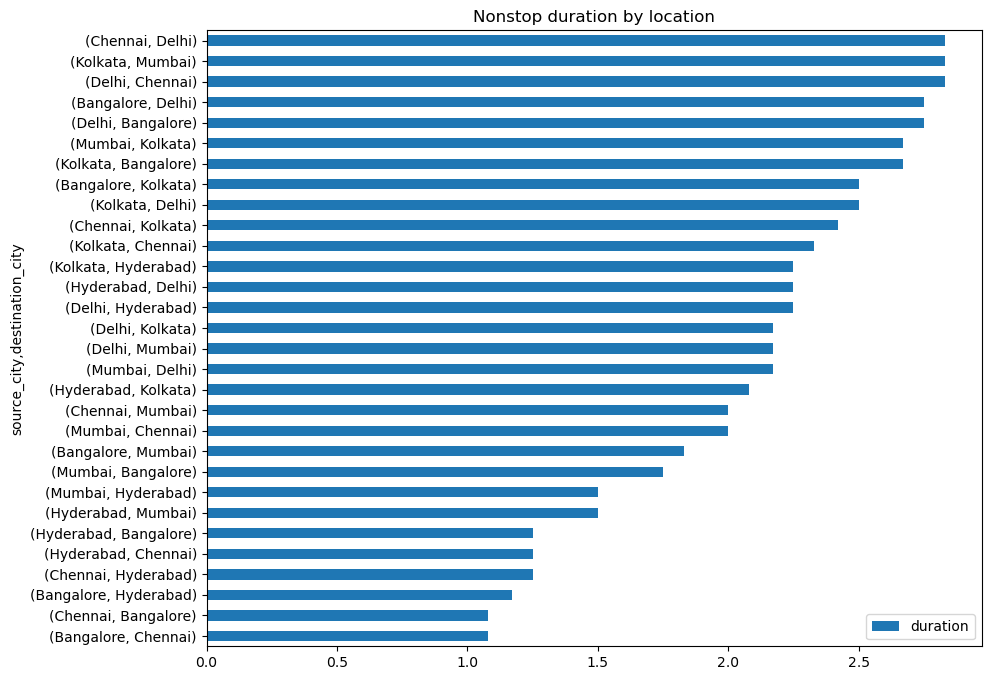

In [180]:
#Visualizaiton 
nonstop_loc_dur.plot(kind='barh', figsize=(10,8))
plt.title('Nonstop duration by location')
plt.show()

In [173]:
#One-stop duration by locations
onestop_loc_dur = df[df['stops'] == 'one'][['source_city', 'destination_city', 'duration']].groupby(['source_city', 'destination_city']).median()\
    .sort_values('duration', ascending=True)
onestop_loc_dur

,,duration
source_city,destination_city,
Bangalore,Delhi,10.00
Delhi,Bangalore,10.00
Chennai,Delhi,10.92
Mumbai,Delhi,11.00
Delhi,Mumbai,11.50
Bangalore,Mumbai,11.50
Hyderabad,Mumbai,11.67
Mumbai,Bangalore,11.83
Hyderabad,Delhi,11.83


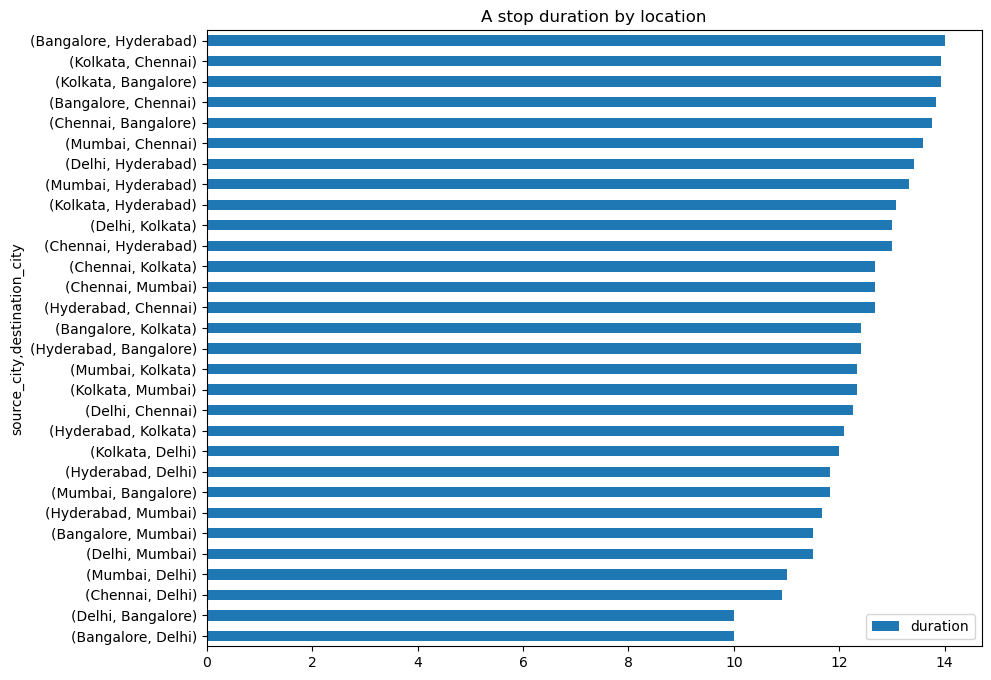

In [50]:
#Nonstop duration by locations 
onestop_loc_dur.plot(kind='barh', figsize=(10,8))
plt.title('A stop duration by location')
plt.show()

stops
one            250863
zero            36004
two_or_more     13286
dtype: int64

In [52]:
stops_loc_dur = df[df['stops'] == 'two_or_more'][['source_city', 'destination_city', 'duration']].groupby(['source_city', 'destination_city']).median()\
    .sort_values('duration', ascending=True)
stops_loc_dur

duration
source_city destination_city          
Mumbai      Delhi                7.830
Hyderabad   Delhi                8.830
            Bangalore            9.420
Delhi       Mumbai               9.670
Bangalore   Delhi                9.790
Delhi       Hyderabad            9.830
Mumbai      Kolkata             10.000
            Chennai             10.500
Delhi       Bangalore           10.875
Kolkata     Bangalore           11.500
Hyderabad   Kolkata             11.920
Chennai     Bangalore           11.920
Bangalore   Kolkata             12.000
Mumbai      Hyderabad           12.750
Kolkata     Hyderabad           13.000
            Delhi               13.000
Delhi       Kolkata             13.080
Kolkata     Mumbai              13.670
Chennai     Hyderabad           14.170
            Mumbai              14.375
Hyderabad   Chennai             14.415
Chennai     Kolkata             14.915
Delhi       Chennai             15.170
Bangalore   Mumbai              15.250
Kolkata     Chennai             15.920
Bangalore   Chennai             15.920
Chennai     Delhi               16.000
Hyderabad   Mumbai              17.080
Mumbai      Bangalore           20.375
Bangalore   Hyderabad           23.250

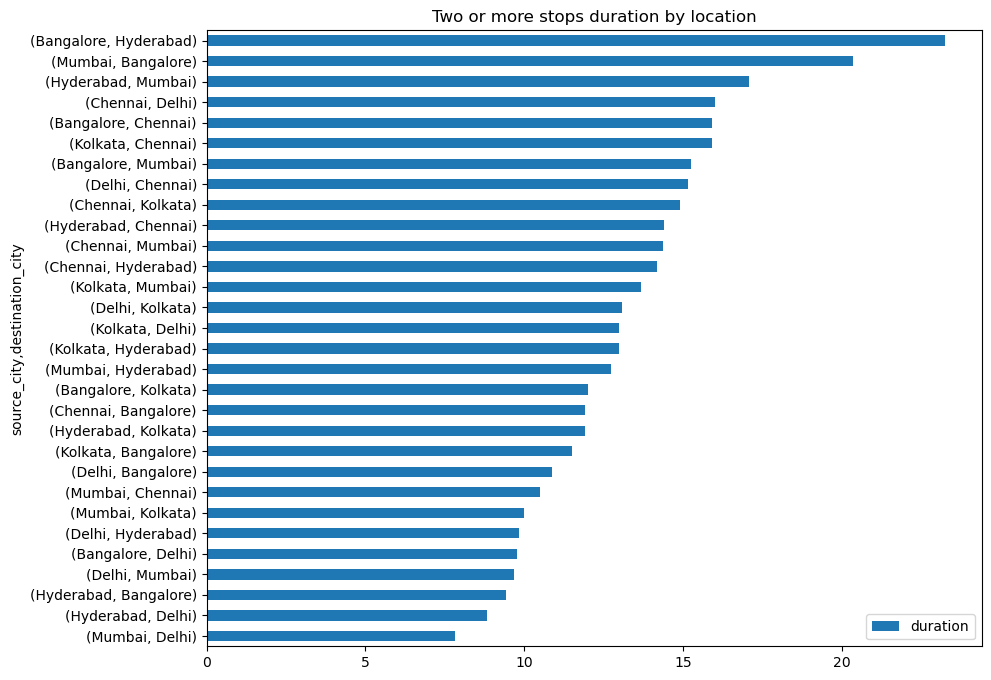

In [53]:
#Two or more stops duration by locations 
stops_loc_dur.plot(kind='barh', figsize=(10,8))
plt.title('Two or more stops duration by location')
plt.show()

# Modeling

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Handling Categorical features

In [80]:
clean_df = pd.get_dummies(df)
clean_df

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
300149,10.42,49,77105,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300150,13.83,49,79099,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300151,10.00,49,81585,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [81]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
clean_df0 = pd.concat([pd.DataFrame(enc.fit(df.loc[:,:'class']).transform(df.loc[:,:'class']).toarray(),
                                       columns=enc.get_feature_names_out()), df.loc[:,'duration':]], axis=1)
clean_df0

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,duration,days_left,price
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.17,1,5953
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.33,1,5953
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.17,1,5956
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.25,1,5955
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.08,49,69265
300149,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.42,49,77105
300150,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.83,49,79099
300151,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.00,49,81585


In [82]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse_output=False)
clean_df1 = pd.concat([pd.DataFrame(enc.fit(df.loc[:,:'class']).transform(df.loc[:,:'class']),
                                       columns=enc.get_feature_names_out()), df.loc[:,'duration':]], axis=1)
clean_df1

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,duration,days_left,price
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.17,1,5953
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.33,1,5953
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.17,1,5956
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.25,1,5955
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.08,49,69265
300149,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.42,49,77105
300150,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.83,49,79099
300151,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.00,49,81585


In [83]:
def clean_df(df):
    categoricals = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
    for column in categoricals:
        col_index = df.columns.get_loc(column)
        df = pd.concat([df.iloc[:,:col_index], pd.get_dummies(df.loc[:,[column]]),df.iloc[:,col_index+1:]], axis=1)
    return df
df_clean = clean_df(df.copy())
df_clean

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left,price
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,2.17,1,5953
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,2.33,1,5953
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,2.17,1,5956
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,2.25,1,5955
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,10.08,49,69265
300149,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,10.42,49,77105
300150,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,13.83,49,79099
300151,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,10.00,49,81585


In [84]:
clean_df0.describe().T

,count,mean,std,min,25%,50%,75%,max
airline_Air_India,300153.0,0.269503,0.443702,0.00,0.00,0.00,1.00,1.00
airline_GO_FIRST,300153.0,0.077204,0.266915,0.00,0.00,0.00,0.00,1.00
airline_Indigo,300153.0,0.143660,0.350745,0.00,0.00,0.00,0.00,1.00
airline_SpiceJet,300153.0,0.030021,0.170646,0.00,0.00,0.00,0.00,1.00
airline_Vistara,300153.0,0.425979,0.494491,0.00,0.00,0.00,1.00,1.00
source_city_Chennai,300153.0,0.128934,0.335128,0.00,0.00,0.00,0.00,1.00
source_city_Delhi,300153.0,0.204372,0.403243,0.00,0.00,0.00,0.00,1.00
source_city_Hyderabad,300153.0,0.135951,0.342737,0.00,0.00,0.00,0.00,1.00
source_city_Kolkata,300153.0,0.154411,0.361343,0.00,0.00,0.00,0.00,1.00
source_city_Mumbai,300153.0,0.202883,0.402147,0.00,0.00,0.00,0.00,1.00


<Axes: >

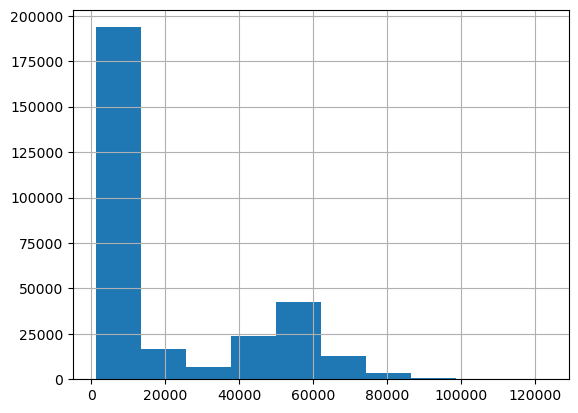

In [85]:
clean_df1['price'].hist()

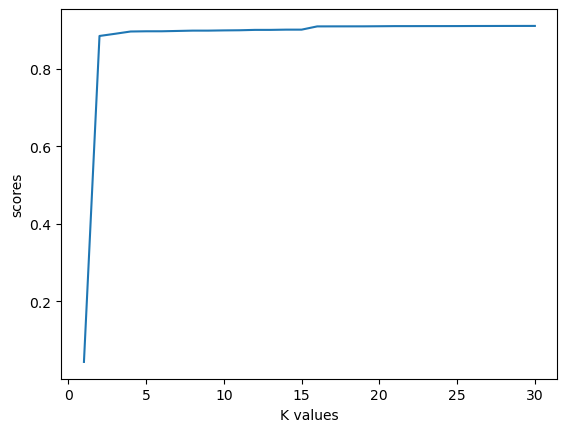

In [59]:
#Univariate Feature Selection
transformer1 = ColumnTransformer(transformers=[('nom_cat',OneHotEncoder(drop='first', sparse_output=False),df.loc[:,:'destination_city'].columns),
                                                  ('ord_cat',OrdinalEncoder(),['class']),
                                                  ('num',MinMaxScaler(),['duration','days_left'])])
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scores = []
features = X_train_tr.shape[1]
for k in range(1,features+1):
    feature_selector = SelectKBest(score_func=mutual_info_regression,k=k)
    pipeline = Pipeline(steps=[('feature_selection',feature_selector),
                               ('regressor',LinearRegression())])
    pipeline.fit(X_train_tr,y_train)
    score = pipeline.score(X_test_tr,y_test)
    scores.append(score)
plt.plot(range(1,features + 1), scores)
plt.xlabel("K values")
plt.ylabel("scores")
plt.show()

In [86]:
#Model-based feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

X = df.drop('price',axis=1)
y = df['price']
transformer1 = ColumnTransformer(transformers=[('nom_cat',OneHotEncoder(drop='first', sparse_output=False),df.loc[:,:'destination_city'].columns),
                                                  ('ord_cat',OrdinalEncoder(),['class']),
                                                  ('num',MinMaxScaler(),['duration','days_left'])])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

rfr = RandomForestRegressor()
feature_selector1 = SelectFromModel(estimator=rfr)
pipeline = Pipeline(steps=[('transformer',transformer1),
                               ('feature_selection',feature_selector1),
                               ('regressor',RandomForestRegressor(random_state=42))])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.9270484164740513

### Target Transformation

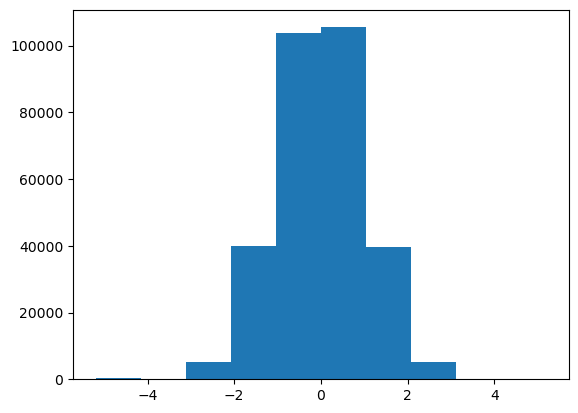

In [87]:
#Quantile
from sklearn.preprocessing import QuantileTransformer
y_tr = QuantileTransformer(output_distribution='normal').fit_transform(y.values.reshape(-1,1))
plt.hist(y_tr)
plt.show()

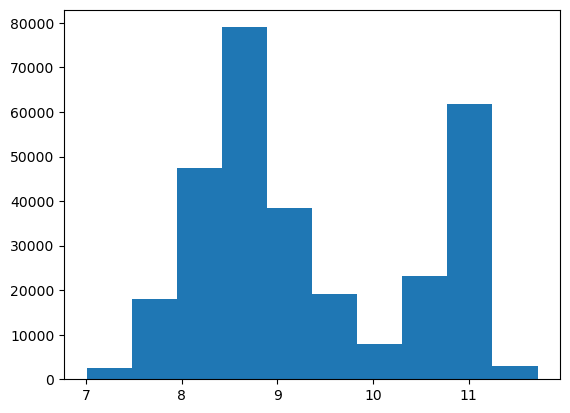

In [88]:
#Log
y_tr0 = np.log(y)
plt.hist(y_tr0)
plt.show()

# Modeling with Target transformation and pipeline

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor

#Splitting Dataset
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#Scaling Features
transformer1 = ColumnTransformer(transformers=[('nom_cat',OneHotEncoder(drop='first', sparse_output=False),df.loc[:,:'destination_city'].columns),
                                               ('ord_cat',OrdinalEncoder(),['class']),
                                                  ('num',StandardScaler(),['duration','days_left'])])

#Feature Selection
feature_selector = SelectKBest(score_func=mutual_info_regression,k=29)

#Pipeline with Linear Regression Model
pipeline = Pipeline(steps=[('transformer',transformer1),
                               ('feature_selection',feature_selector),
                            ('regressor',LinearRegression())])

#Quantile Target transformation with pipeline
pipeline_lr = TransformedTargetRegressor(regressor=pipeline,transformer=QuantileTransformer(output_distribution='normal', random_state=42))
pipeline_lr.fit(X_train,y_train)
pipeline_lr.score(X_test,y_test)

0.9071926582647616

In [90]:
#Log Target transformation with pipeline
pipeline_lr1 = TransformedTargetRegressor(regressor=pipeline,func=np.log,inverse_func=np.exp)
pipeline_lr1.fit(X_train,y_train)
pipeline_lr1.score(X_test,y_test)

0.8818503334224698

In [95]:
#Pipeline with Random Forest Regression Model
feature_selector = SelectKBest(score_func=mutual_info_regression,k=29)
pipeline1 = Pipeline(steps=[('transformer',transformer1),
                               ('feature_selection',feature_selector),
                            ('regressor',RandomForestRegressor(n_estimators = 200, random_state=42))])

#Target transformation with pipeline
pipeline_rfr = TransformedTargetRegressor(regressor=pipeline1,transformer=QuantileTransformer(output_distribution='normal', random_state=42))
pipeline_rfr.fit(X_train,y_train)
pipeline_rfr.score(X_test,y_test)

0.9838980724440581

In [96]:
print("Train score: {:.3f}".format(pipeline_rfr.score(X_train,y_train)))
print("Train error: {:.3f}".format(mse(y_train, pipeline_rfr.predict(X_train))))
print("Train real_error: {:.3f}".format(np.sqrt(mse(y_train, pipeline_rfr.predict(X_train)))))
print("Test score: {:.3f}".format(pipeline_rfr.score(X_test,y_test)))
print("Test error: {:.3f}".format(mse(y_test, pipeline_rfr.predict(X_test))))
print("Test real_error: {:.3f}".format(np.sqrt(mse(y_test, pipeline_rfr.predict(X_test)))))

Train score: 0.997
Train error: 1732772.478
Train real_error: 1316.348
Test score: 0.984
Test error: 8302443.917
Test real_error: 2881.396


In [97]:
#Log Target transformation with pipeline
pipeline_rfr0 = TransformedTargetRegressor(regressor=pipeline1,func=np.log,inverse_func=np.exp)
pipeline_rfr0.fit(X_train,y_train)
pipeline_rfr0.score(X_test,y_test)

0.9846854708652607

In [99]:
from sklearn.metrics import mean_absolute_error
print("Train R2_score: {:.3f}".format(pipeline_rfr0.score(X_train,y_train)))
print("Train Mean_Squared_Error: {:.3f}".format(mse(y_train, pipeline_rfr0.predict(X_train))))
print("Train Root_Mean_Squared_Error: {:.3f}".format(np.sqrt(mse(y_train, pipeline_rfr0.predict(X_train)))))
print("Train Mean_Absolute_Error: {:.3f}".format(mean_absolute_error(y_train,pipeline_rfr0.predict(X_train))))
print("Test R2_score: {:.3f}".format(pipeline_rfr0.score(X_test,y_test)))
print("Test Mean_Squared_Error: {:.3f}".format(mse(y_test, pipeline_rfr0.predict(X_test))))
print("Test Root_Mean_Squared_Eror: {:.3f}".format(np.sqrt(mse(y_test, pipeline_rfr0.predict(X_test)))))
print("Test Mean_Absolute_Eror: {:.3f}".format(mean_absolute_error(y_test,pipeline_rfr0.predict(X_test))))

Train R2_score: 0.997
Train Mean_Squared_Error: 1359439.573
Train Root_Mean_Squared_Error: 1165.950
Train Mean_Absolute_Error: 421.259
Test R2_score: 0.985
Test Mean_Squared_Error: 7896447.107
Test Root_Mean_Squared_Eror: 2810.062
Test Mean_Absolute_Eror: 1069.424


In [102]:
#Pipeline with Gradient Boosting Regression Model
from sklearn.ensemble import GradientBoostingRegressor
pipeline2 = Pipeline(steps=[('transformer',transformer1),
                               ('feature_selection',feature_selector),
                            ('regressor',GradientBoostingRegressor(random_state=42))])
#Target transformation with pipeline
pipeline_gbr = TransformedTargetRegressor(regressor=pipeline2,transformer=QuantileTransformer(output_distribution='normal'))
pipeline_gbr.fit(X_train,y_train)
pipeline_gbr.score(X_test,y_test)

0.9391025999421515

In [103]:
#Log Target transformation with pipeline
pipeline_gbr0 = TransformedTargetRegressor(regressor=pipeline2,func=np.log,inverse_func=np.exp)
pipeline_gbr0.fit(X_train,y_train)
pipeline_gbr0.score(X_test,y_test)

0.9488142161622002

In [105]:
Scores = {"Model": ["Linear Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"],
         "R2_score": [round(pipeline_lr.score(X_test,y_test),3), round(pipeline_rfr0.score(X_test,y_test),3), round(pipeline_gbr0.score(X_test,y_test),3)],
         "Mean_Squared_Error": [round(mse(y_test, pipeline_lr.predict(X_test)),3), round(mse(y_test, pipeline_rfr0.predict(X_test)),3), round(mse(y_test, pipeline_gbr0.predict(X_test)),3)],
         "Root_Mean_Squared_Error": [round(np.sqrt(mse(y_test, pipeline_lr.predict(X_test))),3), round(np.sqrt(mse(y_test, pipeline_rfr0.predict(X_test))),3), round(np.sqrt(mse(y_test, pipeline_gbr0.predict(X_test))),3)],
         "Mean_Absolute_Error": [round(mean_absolute_error(y_test,pipeline_lr.predict(X_test)),3), round(mean_absolute_error(y_test,pipeline_rfr0.predict(X_test)),3), round(mean_absolute_error(y_test,pipeline_gbr0.predict(X_test)),3)],
         "Mean_Absolute_Percentage_Error": [round(np.mean(np.abs(y_test-pipeline_lr.predict(X_test))/y_test)*100,3), round(np.mean(np.abs(y_test-pipeline_rfr0.predict(X_test))/y_test)*100,3), round(np.mean(np.abs(y_test-pipeline_gbr0.predict(X_test))/y_test)*100,3)]}
Scores = pd.DataFrame(Scores)
Scores

,Model,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error
0,Linear Regressor,0.907,4.785314e+07,6917.596,4090.577,25.419
1,Random Forest Regressor,0.985,7.896447e+06,2810.062,1069.424,6.585
2,Gradient Boosting Regressor,0.949,2.639231e+07,5137.345,2956.782,18.747


In [107]:
Scores.T

,0,1,2
Model,Linear Regressor,Random Forest Regressor,Gradient Boosting Regressor
R2_score,0.907,0.985,0.949
Mean_Squared_Error,47853137.283,7896447.107,26392312.237
Root_Mean_Squared_Error,6917.596,2810.062,5137.345
Mean_Absolute_Error,4090.577,1069.424,2956.782
Mean_Absolute_Percentage_Error,25.419,6.585,18.747


In [109]:
prediction_output = pd.DataFrame({'actual_price':y_test,'predicted_price':pipeline_rfr0.predict(X_test), 'residual':y_test-pipeline_rfr0.predict(X_test)})
prediction_output.head(20)

,actual_price,predicted_price,residual
27131,7366,7324.614537,4.138546e+01
266857,64831,70618.593839,-5.787594e+03
141228,6195,6197.576240,-2.576240e+00
288329,60160,60317.428643,-1.574286e+02
97334,6578,6040.041108,5.379589e+02
135931,4555,6287.698639,-1.732699e+03
290630,23838,23838.000000,-6.621121e-10
141944,3860,3855.835203,4.164797e+00
244517,32230,48753.153506,-1.652315e+04
215903,76841,64734.274415,1.210673e+04


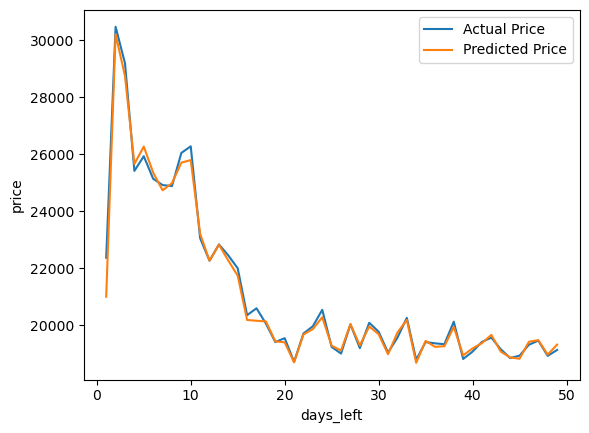

In [91]:
import warnings
warnings.filterwarnings('ignore')

sns.lineplot(x = df['days_left'], y= prediction_output['actual_price'], label='Actual Price', ci=None)
sns.lineplot(x = df['days_left'], y = prediction_output['predicted_price'], label='Predicted Price', ci=None)
plt.ylabel('price')
plt.show()

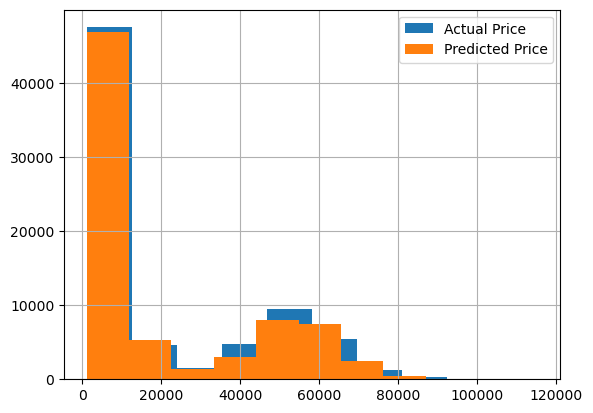

In [111]:
prediction_output['actual_price'].hist(label='Actual Price')
prediction_output['predicted_price'].hist(label='Predicted Price')
plt.legend()
plt.show()